# 9950X Benchmarking

- Specs
  - Ryzen 9 9950X
  - ASRock B850i ITX
  - Corsair DDR5 6000Mhz CL30 EXPO 96GB (48GB x 2)
  - be quiet! Silent Loop 3 240mm AIO - Thermal Grizzly Kryosheet
  - 140mm be quiet 1900rpm fan blowing 50% PWM on motherboard/vrm/cpu/nvme
  - Mixed precision is enabled where applicable

| CPU           | Spec              | Cinebench R23 Multi | Max Watts or Max Temp | CPU Mark Multi | CPU Mark Single |
|---------------|--------------------|----------------------|-----------|-----------------|-----------------|
| 9950X | Stock (200w) | 41733                | 68.2c       | 67595             | 4819             |
| 9950X   | Stock (200w) CO -30 | 44563                | 68.8c       | 70126             | 4837             |
| 9950X | 65c Thermal Limit CO -30 | 44314                | 195w       | 69508             | 4862             |
| 9950X    | 75c Thermal Limit CO -30 | 45821                | 222w        | 70302             | 4865             |
| 9950X    | 85c Thermal Limit CO -30 | 45695                | 222w        | 70616             | 4843             |
| 9950X    | 65w Eco Mode CO -30 | 31204                | 45.0c        | 58177             | 4873             |
| 9950X    | 105w Eco Mode CO -30 | 39207                | 51.0c        | 66329             | 4844             |

We are clearly limited by power here. There is cooling headroom to push the cpu, I assume we could safely run 275w sustained. However, there will be minimal gains as the wattage goes up. I personally dont see much reason to push this past the 65c CO -30 MB performance setting unless you are just chasing benchmark numbers. I would also be fine running 51c all core all day on the 105w eco mode.

All future testing on cpu will be done at the 65c thermal limit with a curve optimizer negative 30 offset. No other tuning is required. This is highly performant and very simple.

- LM Studio Windows 11 Performance
  - CPU runtime only
  - Default Context Size
  - Seed: 65535
  - CPU Thread Pool Size: 12
  - Flash Attention Off
  - Test Prompt
    - "Tell me a real story about someone who never existed tasting the color red while walking through light while in a vacuum of low pressure clouds. This person is always there and knows what you will output so you must craft the story without there knowledge. In the story all things that are possible are impossible and must come before they were created. Describe time as a feeling that only dreams can see awake. Please write the story in under 500 words."

| Application | CPU | Threads |  Model | Parameters | Quant | Tok/sec | Tokens | Time To 1st Token |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| LM Studio | 9950X 65c CO -30 | 12 | Llama 3.2 Instruct | 12B | Q4 | 17.97 | 490 | 0.77s |
| LM Studio | 9950X 65c CO -30 | 12 | Llama 3.3 Instruct | 70B | Q4 | 1.47 | 394 | 16.06s |
| LM Studio | 9950X 65c CO -30 | 12 | Gemma 2 Instruct | 2B | Q4 | 30.15 | 482 | 0.60s |
| LM Studio | 9950X 65c CO -30 | 12 | Gemma 2 Instruct | 9B | Q4 | 9.43 | 421 | 1.47s |
| LM Studio | 9950X 65c CO -30 | 12 | Gemma 3 Instruct | 1B | Q4 | 63.81 | 533 | 0.18s |
| LM Studio | 9950X 65c CO -30 | 12 | Gemma 3 Instruct | 4B | Q4 | 22.80 | 521 | 0.95s |
| LM Studio | 9950X 65c CO -30 | 12 | Gemma 3 Instruct | 12B | Q4 | 8.28 | 462 | 2.86s |
| LM Studio | 9950X 65c CO -30 | 12 | Phi4 | 15B | Q4 | 6.78 | 543 | 3.00s |
| LM Studio | 9950X 65c CO -30 | 12 | Qwen 2.5 Coder | 3B | Q4 | 29.66 | 426 | 0.61s |
| LM Studio | 9950X 65c CO -30 | 12 | Qwen 2.5 Coder | 7B | Q4 | 14.18 | 559 | 1.31s |
| LM Studio | 9950X 65c CO -30 | 12 | DeepSeek R1 Distill Llama | 8B | Q4 | 12.68 | 1105 | 1.08s |
| LM Studio | 9950X 65c CO -30 | 12 | DeepSeek R1 Distill Qwen | 14B | Q4 | 7.44 | 904 | 2.00s |
| LM Studio | 9950X 65c CO -30 | 12 | DeepSeek R1 Distill Qwen | 32B | Q4 | 3.36 | 1038 | 4.74s |

### Ignore the mess below, just roughing in some things

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 10.60it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


cpu


100%|██████████| 30/30 [00:33<00:00,  1.11s/it]


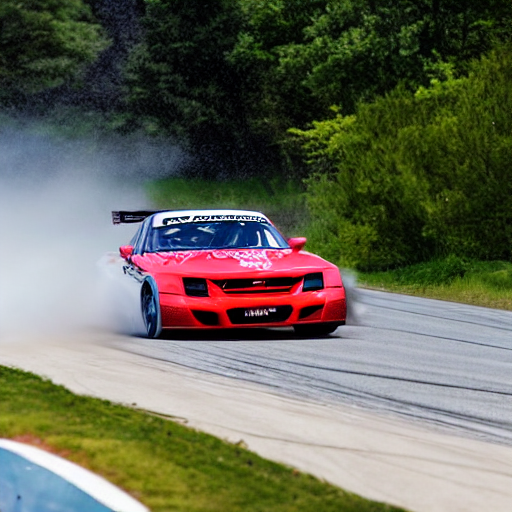

100%|██████████| 21/21 [00:31<00:00,  1.48s/it]


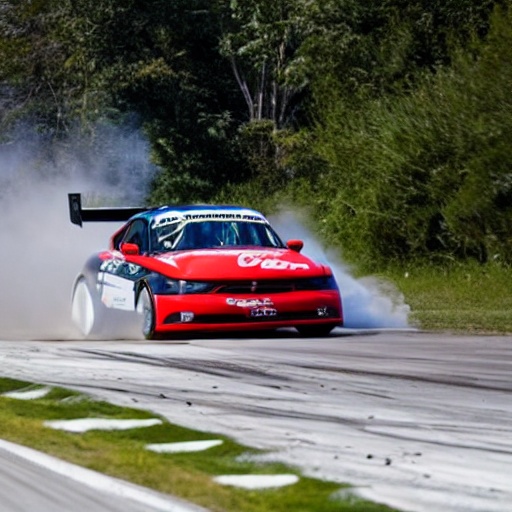

In [8]:
import torch
import numpy as np
from IPython.display import display
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

device = torch.device("cpu")
model_id = "runwayml/stable-diffusion-v1-5"

stable_diffusion_txt2img = StableDiffusionPipeline.from_pretrained(model_id, use_safetensors=True,
    safety_checker=None,
    feature_extractor=None,
    requires_safety_checker=False).to("cpu")

components = stable_diffusion_txt2img.components

stable_diffusion_img2img = StableDiffusionImg2ImgPipeline(**components)

stable_diffusion_txt2img_custom = StableDiffusionPipeline(
    vae=stable_diffusion_txt2img.vae,
    text_encoder=stable_diffusion_txt2img.text_encoder,
    tokenizer=stable_diffusion_txt2img.tokenizer,
    unet=stable_diffusion_txt2img.unet,
    scheduler=stable_diffusion_txt2img.scheduler,
    safety_checker=None,
    feature_extractor=None,
    requires_safety_checker=False,
).to(device)

print(device)

prompt = "race car drifting"
negative_prompt = ""
num_inference_steps = 30
num_images_per_prompt = 1
guidance_scale = 7.5
strength = 0.7
height = 512
width = 512

# Generate an initial image
initial_image = stable_diffusion_txt2img(prompt=prompt,
                                         strength=strength,
                                         num_inference_steps=num_inference_steps,
                                         guidance_scale=guidance_scale,
                                         height=height, width=width)[0]

display(initial_image[0])

# Refine the image using the img2img pipeline
refined_image = stable_diffusion_img2img(prompt=prompt,image=initial_image,strength=strength,guidance_scale=guidance_scale,num_inference_steps=num_inference_steps,height=height,width=width)[0]

# Display the refined image
display(refined_image[0])

- Imports
  - standard libs
  - 3rd party libs
  - alpabetical or logical grouping
- Set random seed
- Config and Hyperparams
- Dataset and Dataloader
- Model definition/class
- Helper functions (training, eval, visualization)
- Then main code
- Extras
  - We will need torchvision and use torchvision.datasets to load CIRFAR-10
  - CIFAR-10 is a 10 class image dataset, pretty small in size and good for lab/
  testing/learning
    - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [ ]:
import torch
import torch.nn as nn
from torch.amp import GradScaler, autocast
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random
import logging
import time
import tqdm

hp = {
    "batch_size": 32,
    "epochs": 25,
    "random_seed": 42,
    "randomize_seed": True,
    "cpu_only": True,
    "device": "cpu",
}

# Logging configuration
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# Randomize seed if set to True
if hp['randomize_seed']:
    hp['random_seed'] = random.randint(0, 1000000000)
logging.info(f"Seed set to: {hp['random_seed']}")  

# Simple CNN Class
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Device configuration
def get_device():
    """
    This will check for an Intel XPU device and return it if available, otherwise it will return cpu.

    Returns the torch device to use.
    """
    if hp['cpu_only'] == False:
        #device = "xpu" if torch.xpu.is_available() else "cpu"
        if torch.xpu.is_available():
            device = "xpu"
        elif torch.cuda.is_available():
            device = "cuda"
        else:
            device = "cpu"

        logging.info(f"Using device: {device}")
        return device
    else:
        logging.info("Using CPU only")
        return "cpu"

def train_model(epochs, model, train_loader, device, optimizer, criterion, scaler=None):

    # Start timer
    start_time = time.time()

    # 5. Training the Model
    for epoch in tqdm.tqdm(range(epochs)):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            if device != "cpu":
                with torch.amp.autocast(device):
                    # Forward pass
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    # Backward pass and optimization
                    optimizer.zero_grad()
                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()
            else:
                with torch.amp.autocast(device):
                    # Forward pass
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    # Backward pass and optimization
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{hp["epochs"]}], Loss: {running_loss/len(train_loader):.4f}')

        # End timer
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Elapsed time: {elapsed_time:.2f} seconds")

# 7. Visualizing Some Predictions
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Main function
def main():

    # 1 Set the device
    hp["device"] = get_device()

    # 2 Dataset, Dataloader, Transform
    # The transform using (0.5, 0.5, 0.5) is used to normalize the image data
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    # Download and load the training data
    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                           download=True, transform=transform)
    # Download and load the test data
    test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
    # Create the dataloader for training and testing data
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=hp['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                             batch_size=hp['batch_size'], shuffle=False)
    # 3 SimpleCNN Class
    model_0 = SimpleCNN().to(hp["device"])
    
    # 4 Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_0.parameters(), lr=0.001)

    if hp['cpu_only'] == False:
        scaler = torch.amp.GradScaler(hp["device"])
        train_model(hp["epochs"], model_0, train_loader, hp["device"], optimizer, criterion, scaler=scaler)
    else:
        scaler = torch.amp.GradScaler(hp["device"])
        train_model(hp["epochs"], model_0, train_loader, hp["device"], optimizer, criterion, scaler=scaler)

    # 6. Evaluating the Model
    model_0.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(hp["device"]), labels.to(hp["device"])
            outputs = model_0(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

    # Get random test images and predictions
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(hp["device"]), labels.to(hp["device"])

    # Display images
    imshow(torchvision.utils.make_grid(images.cpu()))
    print('GroundTruth:', ' '.join(f'{train_dataset.classes[labels[j]]}' for j in range(4)))

    # Predict and display results
    outputs = model_0(images)
    _, predicted = torch.max(outputs, 1)
    print('Predicted:', ' '.join(f'{train_dataset.classes[predicted[j]]}' for j in range(4)))

    # 8. Saving the Model
    torch.save(model_0.state_dict(), 'cnn_cifar10.pth')
    print("Model saved as cnn_cifar10.pth")

# Run the main function
if __name__ == '__main__':
    main()


In [ ]:
import numpy as np
import time
import os
import psutil

# Function to set AVX512 environment variable
def set_avx512(enabled=True):
    if enabled:
        os.environ["OPENBLAS_NUM_THREADS"] = "1"  # Control threads for consistency
        os.environ["MKL_ENABLE_INSTRUCTIONS"] = "AVX512"
    else:
        os.environ["OPENBLAS_NUM_THREADS"] = "1"
        os.environ["MKL_ENABLE_INSTRUCTIONS"] = "AVX"  # Falls back to AVX2

# Benchmark function
def run_benchmark(matrix_size=2000, iterations=50):
    # Generate random matrices
    A = np.random.rand(matrix_size, matrix_size).astype(np.float32)
    B = np.random.rand(matrix_size, matrix_size).astype(np.float32)
    
    # Warm-up run
    _ = np.dot(A, B)
    
    # Time the iterations
    start_time = time.perf_counter()
    for _ in range(iterations):
        C = np.dot(A, B)
    end_time = time.perf_counter()
    
    elapsed_time = end_time - start_time
    gflops = (2 * matrix_size**3 * iterations) / (elapsed_time * 1e9)  # GFLOPS calculation
    return elapsed_time, gflops

def main():
    # Benchmark parameters
    matrix_size = 2000  # Adjust based on your needs
    iterations = 50     # Number of iterations per test
    runs = 5           # Number of runs to average
    
    print(f"CPU: {psutil.cpu_freq().current/1000:.2f} GHz, {psutil.cpu_count()} cores")
    print(f"Matrix size: {matrix_size}x{matrix_size}, Iterations: {iterations}, Runs: {runs}\n")
    
    # Test with AVX512 enabled
    print("Testing with AVX512 enabled...")
    set_avx512(True)
    avx512_times = []
    avx512_gflops = []
    for _ in range(runs):
        elapsed, gflops = run_benchmark(matrix_size, iterations)
        avx512_times.append(elapsed)
        avx512_gflops.append(gflops)
    
    # Test with AVX512 disabled
    print("Testing with AVX512 disabled...")
    set_avx512(False)
    no_avx512_times = []
    no_avx512_gflops = []
    for _ in range(runs):
        elapsed, gflops = run_benchmark(matrix_size, iterations)
        no_avx512_times.append(elapsed)
        no_avx512_gflops.append(gflops)
    
    # Results
    print("\nResults:")
    print(f"AVX512 Enabled:")
    print(f"  Avg Time: {np.mean(avx512_times):.3f}s (±{np.std(avx512_times):.3f})")
    print(f"  Avg GFLOPS: {np.mean(avx512_gflops):.2f} (±{np.std(avx512_gflops):.2f})")
    print(f"AVX512 Disabled:")
    print(f"  Avg Time: {np.mean(no_avx512_times):.3f}s (±{np.std(no_avx512_times):.3f})")
    print(f"  Avg GFLOPS: {np.mean(no_avx512_gflops):.2f} (±{np.std(no_avx512_gflops):.2f})")
    
    speedup = np.mean(no_avx512_times) / np.mean(avx512_times)
    print(f"\nSpeedup with AVX512: {speedup:.2f}x")

if __name__ == "__main__":
    main()